In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [3]:
# df_heat = df[  (df['ap_lo'] <= df['ap_hi'])
#              & (df['height'] >= df['height'].quantile(0.025))
#              & (df['height'] <= df['height'].quantile(0.975))
#              & (df['weight'] >= df['weight'].quantile(0.025))
#              & (df['weight'] <= df['weight'].quantile(0.975))]

df = df[ ( df['value'] > df['value'].quantile(0.025) ) 
   & ( df['value'] < df['value'].quantile(0.975) )]

In [4]:
def draw_line_plot():
    # Draw line plot

    fig = sns.lineplot(df)



    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

AttributeError: 'Axes' object has no attribute 'savefig'

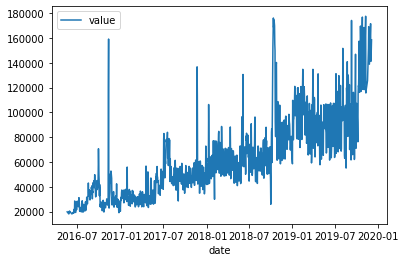

In [5]:
draw_line_plot()